In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

np.random.seed(7)

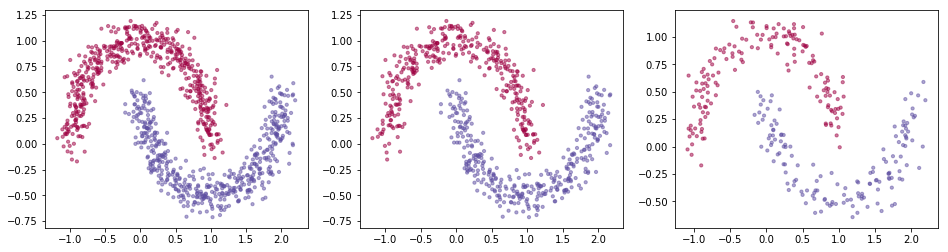

In [2]:
X_sample, Y_sample = make_moons(1000, noise=0.1)
X_train, X_test, Y_train, Y_test = train_test_split(X_sample, Y_sample, test_size=0.3)

Y_train = Y_train.reshape((len(Y_train),1))
Y_test = Y_test.reshape((len(Y_test),1))

f, ax = plt.subplots(1, 3, figsize=(16,4))
ax[0].scatter(X_sample[:, 0], X_sample[:, 1], s=10, c=Y_sample, cmap=plt.cm.Spectral, alpha=0.5)
ax[1].scatter(X_train[:, 0], X_train[:, 1], s=10, c=Y_train, cmap=plt.cm.Spectral, alpha=0.5)
ax[2].scatter(X_test[:, 0], X_test[:, 1], s=10, c=Y_test, cmap=plt.cm.Spectral, alpha=0.5)
plt.show()

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD # stochastic gradient descent

Using TensorFlow backend.


In [65]:
model = Sequential()
model.add(Dense(5, input_dim=2, activation='relu', name='hidden'))
model.add(Dense(1, activation='sigmoid', name='output'))
sgd = SGD(lr=0.01)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 5)                 15        
_________________________________________________________________
output (Dense)               (None, 1)                 6         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
None


In [66]:
model.get_config()

[{'class_name': 'Dense',
  'config': {'activation': 'relu',
   'activity_regularizer': None,
   'batch_input_shape': (None, 2),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'dtype': 'float32',
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_regularizer': None,
   'name': 'hidden',
   'trainable': True,
   'units': 5,
   'use_bias': True}},
 {'class_name': 'Dense',
  'config': {'activation': 'sigmoid',
   'activity_regularizer': None,
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_re

In [67]:
history = model.fit(X_train, Y_train, epochs=1000, batch_size=100, verbose=0)

In [68]:
score_train = model.evaluate(X_train, Y_train, verbose=0)
print('Train accuracy = %.3f' %score_train[1])
score_test = model.evaluate(X_test, Y_test, verbose=0)
print('Test accuracy = %.3f' %score_test[1])

Train accuracy = 0.891
Test accuracy = 0.913


In [69]:
weights = model.get_weights()
weights

[array([[-0.10007293, -1.64229274, -0.53418094, -0.60842323, -1.76310349],
        [ 2.20993257,  1.03324342, -0.33126965, -0.37673905,  0.04732577]], dtype=float32),
 array([ 0.5062381 , -0.75203133, -0.02133404, -0.02467707, -0.40271372], dtype=float32),
 array([[-2.17442513],
        [-1.38236904],
        [-1.02671695],
        [-0.6770739 ],
        [-3.41467905]], dtype=float32),
 array([ 2.82122684], dtype=float32)]

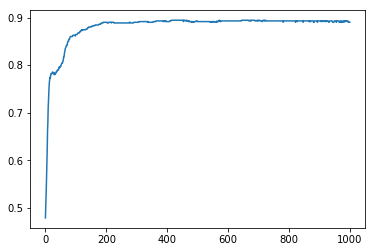

In [70]:
history.history.keys()
plt.plot(history.history['acc'])
plt.show()

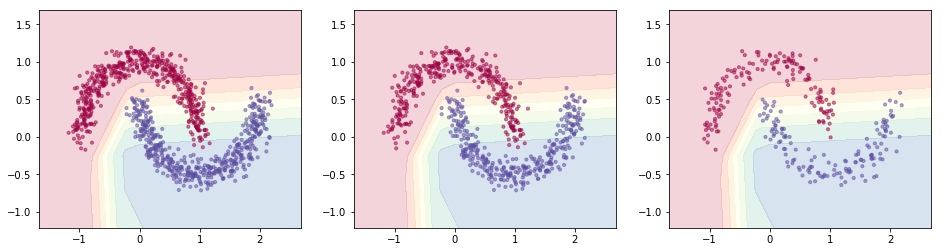

In [71]:
x_min, x_max = X_sample[:, 0].min() - .5, X_sample[:, 0].max() + .5
y_min, y_max = X_sample[:, 1].min() - .5, X_sample[:, 1].max() + .5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X_grid = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(X_grid)
Z = Z.reshape(xx.shape)


f, ax = plt.subplots(1, 3, figsize=(16,4))
ax[0].contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.2)
ax[0].scatter(X_sample[:, 0], X_sample[:, 1], s=10, c=Y_sample, cmap=plt.cm.Spectral, alpha=0.5)
ax[1].contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.2)
ax[1].scatter(X_train[:, 0], X_train[:, 1], s=10, c=Y_train, cmap=plt.cm.Spectral, alpha=0.5)
ax[2].contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.2)
ax[2].scatter(X_test[:, 0], X_test[:, 1], s=10, c=Y_test, cmap=plt.cm.Spectral, alpha=0.5)
plt.show()